In [15]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from os.path import join, isfile

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [16]:
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/grid_search_FE_regular_with_id_xgb_models'
#data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/xgb_model_features_0'
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/combined_xgb_models_038'

#data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/subset_data/xgb_model_features'
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/cross_validate_common_fea_with_thres_xgb_4-folds_MCC_models'

data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/cross_validate_common_fea_with_thres_xgb_models'

In [27]:
def collect_feature_names(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    feature_names = set()
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        if thres_name is None:
            feature_names = feature_names.union(data[fea_name])
        else:
            feature_names = feature_names.union(data.loc[data[thres_name] > thres, fea_name])
            
    return feature_names


def combine_feature_importance_files(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if 'feature_importance' in f]
    fea_imp = None
    file_counter = -1
    score_columns = []
    norm_score_columns = []
    
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        
        if thres_name is not None:
            data = data.loc[data[thres_name] > thres]
            
        data = data.set_index(fea_name)
        print data.shape
        file_counter += 1
        data.columns = ['{}_{}'.format(column, file_counter) for column in data.columns]
        score_columns.append('{}_{}'.format('fscore', file_counter))
        norm_score_columns.append('{}_{}'.format('norm_fscore', file_counter))
        if fea_imp is None:
            fea_imp = data
        else:
            fea_imp = pd.merge(fea_imp, data, how='outer', left_index=True, right_index=True)
    
    fea_imp['fscore_sum'] = fea_imp[score_columns].sum(axis=1)
    fea_imp['norm_fscore_sum'] = fea_imp[norm_score_columns].sum(axis=1)
    fea_imp['norm_fscore_avg'] = fea_imp['norm_fscore_sum'] / fea_imp.shape[0]
    return fea_imp



def combine_feature_score(data_path, fea_name='feature', score_name = None):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_score = None
    
    for i, file_name in enumerate(csv_files):
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        data = data.set_index([fea_name])
        col_name = '{}_{}'.format(score_name, i)
        
        if fea_score is None:
            fea_score = pd.DataFrame()
        
        fea_score[col_name] = data[score_name]

            #fea_score = pd.merge(fea_score, data, how='outer', left_index=True, right_index=True)
            
    return fea_score

In [28]:
#tmp = combine_feature_importance_files(data_path)
#combined_imp = combine_feature_importance_files(data_path, thres_name = 'fscore')
combined_imp = combine_feature_importance_files(data_path)

(304, 2)
(132, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(284, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(303, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(293, 2)
(304, 2)
(304, 2)
(304, 2)
(243, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(303, 2)
(238, 2)
(152, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(288, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(304, 2)
(138, 2)
(303, 2)
(304, 2)
(304, 2)
(145, 2)
(304, 2)
(304, 2)
(304, 2)
(239, 2)
(304, 2)
(304, 2)
(304, 2)
(239, 2)
(304, 2)
(304, 2)
(302, 2)
(290, 2)
(304, 2)
(304, 2)


In [29]:
print combined_imp.shape
combined_imp.tail()

(304, 163)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,norm_fscore_76,fscore_77,norm_fscore_77,fscore_78,norm_fscore_78,fscore_79,norm_fscore_79,fscore_sum,norm_fscore_sum,norm_fscore_avg
feature,,,,,,,,,,,,,,,,,,,,,
time_ratio_value_index_diff_0,65,0.002927,NaN,NaN,925,0.004598,259,0.003430,792,0.004183,...,0.001441,2.0,0.000325,413,0.004755,65,0.002902,23447.0,0.241318,0.000794
time_ratio_value_index_diff_0.1,59,0.002657,NaN,NaN,704,0.003499,198,0.002622,587,0.003100,...,0.000360,3.0,0.000487,244,0.002809,42,0.001875,18155.0,0.184202,0.000606
time_ratio_value_index_diff_1,52,0.002342,NaN,NaN,703,0.003494,267,0.003536,677,0.003575,...,0.001321,1.0,0.000162,287,0.003304,54,0.002410,18512.0,0.184076,0.000606
time_ratio_value_index_diff_1.1,42,0.001891,NaN,NaN,582,0.002893,206,0.002728,506,0.002672,...,0.000600,1.0,0.000162,208,0.002395,28,0.001250,14387.0,0.140501,0.000462
time_sum,178,0.008016,10.0,0.004751,843,0.004190,343,0.004542,761,0.004019,...,0.009727,56.0,0.009097,368,0.004236,141,0.006294,28912.0,0.533317,0.001754


In [30]:
print combined_imp.shape
combined_imp.head()

(304, 163)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,norm_fscore_76,fscore_77,norm_fscore_77,fscore_78,norm_fscore_78,fscore_79,norm_fscore_79,fscore_sum,norm_fscore_sum,norm_fscore_avg
feature,,,,,,,,,,,,,,,,,,,,,
L0_S0_F0,54,0.002432,NaN,NaN,603,0.002997,205,0.002715,440,0.002324,...,0.000961,1.0,0.000162,202,0.002325,35,0.001562,15220.0,0.162943,0.000536
L0_S0_F16,41,0.001846,NaN,NaN,613,0.003047,213,0.002821,521,0.002752,...,0.002882,2.0,0.000325,177,0.002038,54,0.002410,16543.0,0.168282,0.000554
L0_S0_F18,48,0.002162,NaN,NaN,601,0.002987,184,0.002437,669,0.003533,...,0.001441,2.0,0.000325,236,0.002717,44,0.001964,17210.0,0.177632,0.000584
L0_S0_F2,60,0.002702,NaN,NaN,571,0.002838,186,0.002463,518,0.002736,...,0.001441,7.0,0.001137,207,0.002383,39,0.001741,15548.0,0.173717,0.000571
L0_S0_F20,107,0.004819,NaN,NaN,883,0.004389,342,0.004529,877,0.004632,...,0.003603,17.0,0.002762,367,0.004225,90,0.004017,25607.0,0.309822,0.001019


In [31]:
## sort by the norm_fscore_sum
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_avg'], ascending=False)

In [32]:
sorted_combined_imp.tail(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,norm_fscore_76,fscore_77,norm_fscore_77,fscore_78,norm_fscore_78,fscore_79,norm_fscore_79,fscore_sum,norm_fscore_sum,norm_fscore_avg
feature,,,,,,,,,,,,,,,,,,,,,
dat_L0_S7_mean_index_diff_0,31,0.001396,NaN,NaN,434,0.002157,149,0.001973,368,0.001944,...,0.000120,3.0,0.000487,142,0.001635,18,0.000803,10632.0,0.108032,0.000355
L3_S30_F3584,36,0.001621,NaN,NaN,313,0.001556,117,0.001549,343,0.001811,...,0.000480,4.0,0.000650,173,0.001992,42,0.001875,9678.0,0.104887,0.000345
L0_S11_F286,25,0.001126,NaN,NaN,382,0.001899,120,0.001589,327,0.001727,...,0.000841,2.0,0.000325,152,0.001750,21,0.000937,9946.0,0.103943,0.000342
L0_S2_F48,52,0.002342,4.0,0.0019,236,0.001173,102,0.001351,285,0.001505,...,0.002042,7.0,0.001137,94,0.001082,29,0.001295,7308.0,0.103342,0.000340
num_idxmax,25,0.001126,NaN,NaN,363,0.001804,127,0.001682,337,0.001780,...,0.001201,4.0,0.000650,115,0.001324,35,0.001562,9837.0,0.102970,0.000339
dat_L0_mean_index_diff_1.1,42,0.001891,NaN,NaN,327,0.001625,143,0.001894,394,0.002081,...,0.001081,1.0,0.000162,150,0.001727,28,0.001250,10319.0,0.102160,0.000336
dat_L0_mean_index_diff_1,20,0.000901,NaN,NaN,407,0.002023,134,0.001775,365,0.001928,...,NaN,5.0,0.000812,151,0.001738,29,0.001295,10325.0,0.101988,0.000335
dat_L0_S0_var_index_diff_1,19,0.000856,NaN,NaN,242,0.001203,96,0.001271,222,0.001172,...,0.000360,18.0,0.002924,108,0.001243,27,0.001205,7798.0,0.101055,0.000332
num_L0_S0_var_index_diff_1,23,0.001036,NaN,NaN,341,0.001695,99,0.001311,317,0.001674,...,0.000240,2.0,0.000325,142,0.001635,28,0.001250,9616.0,0.098812,0.000325


In [33]:
sorted_combined_imp.head(50)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,norm_fscore_76,fscore_77,norm_fscore_77,fscore_78,norm_fscore_78,fscore_79,norm_fscore_79,fscore_sum,norm_fscore_sum,norm_fscore_avg
feature,,,,,,,,,,,,,,,,,,,,,
first_time_value_index_diff_1,338,0.015221,154.0,0.073159,944,0.004692,578,0.007654,912,0.004817,...,0.029663,268.0,0.043535,599,0.006896,382,0.017052,40086.0,1.399413,0.004603
dat_L3_S33_mean,302,0.013600,78.0,0.037055,1101,0.005473,441,0.005840,1011,0.005339,...,0.024379,213.0,0.034600,648,0.007460,261,0.011651,43963.0,1.249355,0.004110
L3_S30_F3704,233,0.010493,99.0,0.047031,824,0.004096,405,0.005363,785,0.004146,...,0.021136,197.0,0.032001,483,0.005560,254,0.011338,33783.0,1.095778,0.003605
L1_S24_F1723,196,0.008826,69.0,0.032779,684,0.003400,312,0.004132,627,0.003311,...,0.013450,209.0,0.033951,387,0.004455,177,0.007901,26678.0,0.914674,0.003009
dat_L0_mean,267,0.012024,25.0,0.011876,1043,0.005185,517,0.006847,996,0.005260,...,0.021136,109.0,0.017706,629,0.007241,241,0.010758,39246.0,0.902646,0.002969
L3_S32_F3854,180,0.008106,106.0,0.050356,340,0.001690,214,0.002834,364,0.001922,...,0.018014,153.0,0.024854,293,0.003373,237,0.010579,17800.0,0.831279,0.002734
first_time_value_index_diff_1.1,151,0.006800,107.0,0.050831,597,0.002968,327,0.004330,536,0.002831,...,0.017293,122.0,0.019818,339,0.003903,203,0.009062,22356.0,0.794386,0.002613
cat_max,197,0.008871,118.0,0.056057,566,0.002813,266,0.003523,501,0.002646,...,0.018614,93.0,0.015107,326,0.003753,197,0.008794,22020.0,0.756954,0.002490
dat_L3_S29_mean,246,0.011078,47.0,0.022328,742,0.003688,389,0.005151,754,0.003982,...,0.018014,89.0,0.014457,504,0.005802,247,0.011026,30389.0,0.749662,0.002466


In [12]:
nan_boolean_index = sorted_combined_imp.isnull().sum(axis=1) == 0

In [13]:
nan_removed_df = sorted_combined_imp[nan_boolean_index]

In [14]:
print nan_removed_df.shape

(304, 10)


In [28]:
nan_removed_df.head(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
first_time_value_index_diff_1,97.0,0.004692,163.0,0.008015,189.0,0.009079,147.0,0.007055,94.0,0.004646,690.0,0.033487
L3_S30_F3704,153.0,0.007400,123.0,0.006048,49.0,0.002354,162.0,0.007775,186.0,0.009194,673.0,0.032771
L3_S29_F3351,150.0,0.007255,201.0,0.009883,79.0,0.003795,71.0,0.003407,168.0,0.008304,669.0,0.032645
L1_S24_F1723,124.0,0.005998,128.0,0.006294,138.0,0.006629,110.0,0.005279,155.0,0.007662,655.0,0.031861
L3_S33_F3865,126.0,0.006094,98.0,0.004819,130.0,0.006245,184.0,0.008830,85.0,0.004201,623.0,0.030190
num_L3_S33_var_index_diff_0,113.0,0.005466,83.0,0.004081,148.0,0.007110,201.0,0.009646,75.0,0.003707,620.0,0.030010
cat_max,118.0,0.005707,113.0,0.005556,178.0,0.008551,82.0,0.003935,60.0,0.002966,551.0,0.026716
dat_L3_var_index_diff_0,104.0,0.005030,128.0,0.006294,141.0,0.006773,94.0,0.004511,77.0,0.003806,544.0,0.026415
L1_S24_F1846,134.0,0.006481,79.0,0.003885,67.0,0.003219,139.0,0.006671,116.0,0.005734,535.0,0.025989


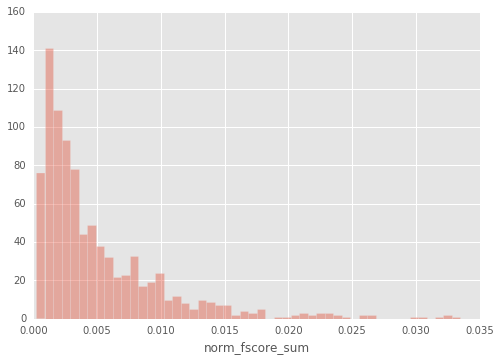

In [27]:
#sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)
sns.distplot(nan_removed_df['norm_fscore_sum'], bins=50, kde=False)

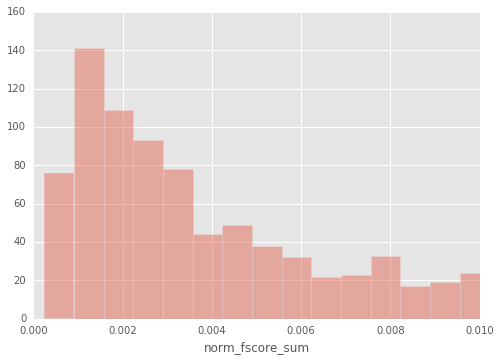

In [30]:
plt.xlim(0, 0.01)
#sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)
sns.distplot(nan_removed_df['norm_fscore_sum'], bins=50, kde=False)

In [19]:
sorted_combined_imp.shape

(1691, 12)

In [33]:
sum(sorted_combined_imp['norm_fscore_sum'] >= 0.005)

313

In [ ]:
sorted_combined_imp.head()

In [ ]:
missing_row_counts = sorted_combined_imp.isnull().sum(axis=1)

In [ ]:
sum(missing_row_counts > 0)

In [ ]:
sorted_combined_imp.tail(200)

In [ ]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)

In [ ]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
sorted_combined_imp.to_csv('~/full_data_xgb_feature_importance.csv')

In [ ]:
top_variable = combined_imp.sort('fscore_sum')[-300:].index

In [ ]:
for col in top_variable:
    if col in train_cat_cols.columns:
        print col

In [ ]:
raw_data_path = '/home/ymm/bosch/'

train_num_file   = 'train_numeric.csv'
train_cat_file   = 'train_categorical.csv'
train_date_file  = 'train_date.csv'
test_num_file    = 'test_numeric.csv'
test_cat_file    = 'test_categorical.csv'
test_date_file   = 'test_date.csv'
sample_submission_file   = 'sample_submission.csv'

start_time_column_name = 'L0_S0_D1'
id_column_name = 'Id'
dep_var_name = 'Response'

train_cat_cols = pd.read_csv(join(raw_data_path, train_cat_file), index_col=id_column_name, nrows=0)
train_date_cols = pd.read_csv(join(raw_data_path, train_date_file), index_col=id_column_name, nrows=0)
train_num_cols = pd.read_csv(join(raw_data_path, train_num_file), index_col=id_column_name, nrows=0)

In [ ]:
## important column disribution
print sum(train_num_cols.columns.isin(combined_imp.index)), sum(train_cat_cols.columns.isin(combined_imp.index)), sum(train_date_cols.columns.isin(combined_imp.index))

In [ ]:
selected_cat_col_names = train_cat_cols.columns[train_cat_cols.columns.isin(combined_imp.index)]

In [ ]:
selected_combined_imp = combined_imp.ix[selected_cat_col_names]

In [ ]:
print selected_combined_imp.shape
selected_combined_imp.head()

In [ ]:
bin_NaN_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_NaN_models'
combined_nan_imp = combine_feature_importance_files(bin_NaN_data_path, thres_name = 'fscore')

In [ ]:
common_col_names = set(combined_nan_imp.index).intersection(set(combined_imp.index))

In [ ]:
print len(combined_imp.index), len(common_col_names), len(combined_nan_imp)

In [ ]:
combined_nan_imp.ix[common_col_names]

In [ ]:
combined_nan_imp.head()

### Analysis on  models trained by 160 features

In [ ]:
'''
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']
'''

In [ ]:
single_xgb_fea_imp = pd.read_csv('/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/final_single_160fea_xgb_models/combinedModel_indexed_0_Xgboost_model_feature_importance.csv', index_col=0)

In [ ]:
print single_xgb_fea_imp.shape
single_xgb_fea_imp.tail(30)

In [ ]:
for fea in single_xgb_fea_imp['feature'].tolist():
    if 'index_diff' in fea:
        print single_xgb_fea_imp[single_xgb_fea_imp['feature'] == fea]

In [ ]:
'dat_L0_mean' in single_xgb_fea_imp['feature'].tolist()

In [ ]:
data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/cross_validate_processed_150_fea_full_data_xgb_models_0'
combined_imp = combine_feature_importance_files(data_path)

In [ ]:
print combined_imp.shape
combined_imp.head()

In [ ]:
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_sum'], ascending=False)

In [ ]:
sorted_combined_imp.head(30)

In [ ]:
'start_time' in sorted_combined_imp['norm_fscore_sum'].tolist()

In [ ]:
sorted_combined_imp['norm_fscore_sum'][:50]